<a href="https://colab.research.google.com/github/jassynavarro/CCMACLRL_EXERCISES_COM221/blob/main/Exercise5_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 5B

# House Price Prediction using Multiple Linear Regression

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

### Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc.  The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity.  

### Instructions:
Choose the independent variables to creata a decent predictive model using multiple linear regression

## Import libraries üêç

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## A. Understanding the Dataset

In [6]:
df = pd.read_csv("house_prices.csv")

In [7]:
# Random 10 samples of data
df.sample(10)

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
488  2852500  5200         4          1        3      yes        no       no   
371  3640000  3570         3          1        2      yes        no      yes   
422  3360000  3720         2          1        1       no        no       no   
349  3780000  4820         3          1        2      yes        no       no   
254  4480000  4510         4          1        2      yes        no       no   
418  3360000  3500         4          1        2      yes        no       no   
100  6230000  6600         3          2        1      yes        no      yes   
366  3675000  3630         2          1        1      yes        no      yes   
506  2604000  2910         2          1        1       no        no       no   
413  3430000  1950         3          2        2      yes        no      yes   

    hotwaterheating airconditioning  parking prefarea furnishingstatus  
488              no              no        0       no      unfurnished  
371              no              no        0       no   semi-furnished  
422              no             yes        0       no      unfurnished  
349              no              no        0       no   semi-furnished  
254              no             yes        2       no   semi-furnished  
418              no             yes        2       no      unfurnished  
100              no             yes        0      yes      unfurnished  
366              no              no        0       no        furnished  
506              no              no        0       no      unfurnished  
413              no              no        0      yes      unfurnished

In [8]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
df.shape # data shape

(545, 13)

In [10]:
df.describe() # data stats

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [11]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [12]:
df.duplicated().sum() # duplicate values check

0

## B. Data Visualization

1. Use a `.scatterplot()` to check the relationship between area and price

- the x axis should be the area
- the y axis should be the price
- the color of each data point should be based on the furnishing status


<Axes: xlabel='area', ylabel='price'>

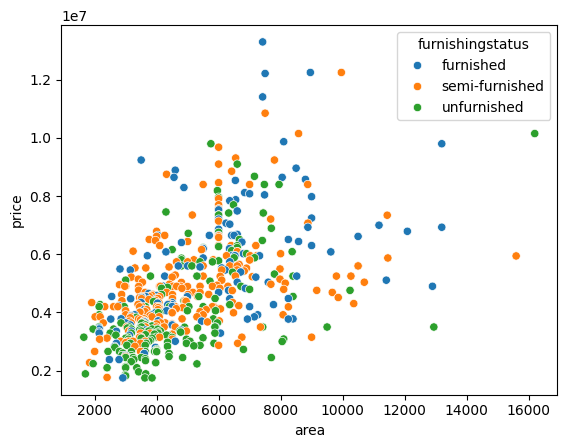

In [13]:
# Put your answer here
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

2. Create a `.pairplot()` to check the relationships between the independent and dependent variables

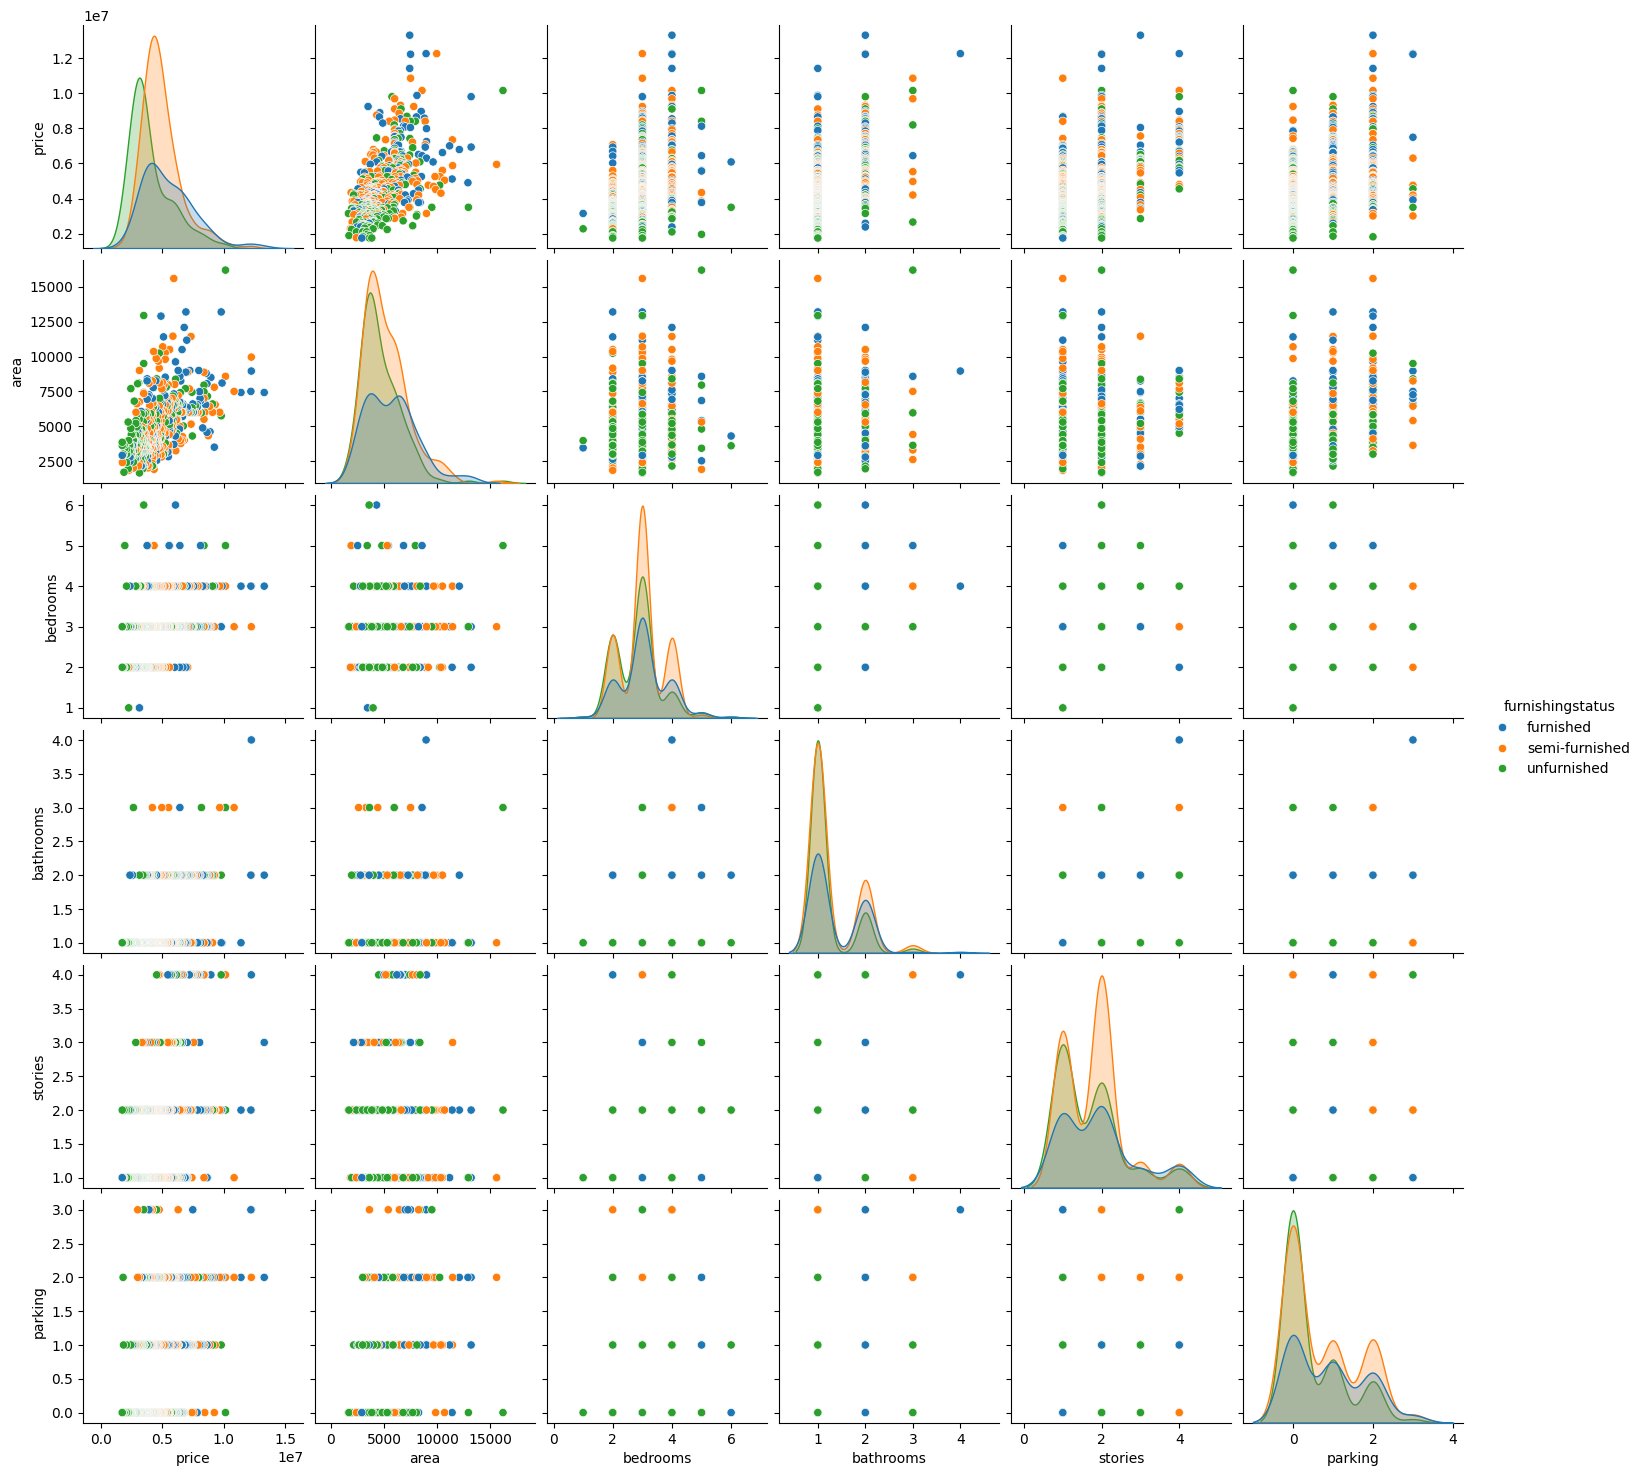

In [14]:
# Put your answer here
sns.pairplot(df,hue="furnishingstatus")

## C. Data pre-processing

3. Create a copy of the dataframe using `.copy()`

In [15]:
# Put your answer here
data=df.copy()

4. Apply the `get_dummies()` method to convert the categorical columns below into numbers/dummy variables.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [16]:
# Put your answer here
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']], drop_first = True)

5. Concatenate the converted columns to the dataframe copy using `.concat()`

In [17]:
# Put your answer here
data = pd.concat([data, status], axis = 1)

6. Drop the categorical columns below using `.drop()`.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [18]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

## D. Feature Selection

7. Use `.corr()` to check for multicollinearity between the features/independent variables

In [19]:
# Put your answer here
correlation = data.corr()
correlation

price      area  bedrooms  bathrooms  \
price                            1.000000  0.535997  0.366494   0.517545   
area                             0.535997  1.000000  0.151858   0.193820   
bedrooms                         0.366494  0.151858  1.000000   0.373930   
bathrooms                        0.517545  0.193820  0.373930   1.000000   
stories                          0.420712  0.083996  0.408564   0.326165   
parking                          0.384394  0.352980  0.139270   0.177496   
furnishingstatus_semi-furnished  0.063656  0.006156  0.050040   0.029834   
furnishingstatus_unfurnished    -0.280587 -0.142278 -0.126252  -0.132107   
mainroad_yes                     0.296898  0.288874 -0.012033   0.042398   
guestroom_yes                    0.255517  0.140297  0.080549   0.126469   
basement_yes                     0.187057  0.047417  0.097312   0.102106   
hotwaterheating_yes              0.093073 -0.009229  0.046049   0.067159   
airconditioning_yes              0.452954  0.222393  0.160603   0.186915   
prefarea_yes                     0.329777  0.234779  0.079023   0.063472   

                                  stories   parking  \
price                            0.420712  0.384394   
area                             0.083996  0.352980   
bedrooms                         0.408564  0.139270   
bathrooms                        0.326165  0.177496   
stories                          1.000000  0.045547   
parking                          0.045547  1.000000   
furnishingstatus_semi-furnished -0.003648  0.041327   
furnishingstatus_unfurnished    -0.082972 -0.165705   
mainroad_yes                     0.121706  0.204433   
guestroom_yes                    0.043538  0.037466   
basement_yes                    -0.172394  0.051497   
hotwaterheating_yes              0.018847  0.067864   
airconditioning_yes              0.293602  0.159173   
prefarea_yes                     0.044425  0.091627   

                                 furnishingstatus_semi-furnished  \
price                                                   0.063656   
area                                                    0.006156   
bedrooms                                                0.050040   
bathrooms                                               0.029834   
stories                                                -0.003648   
parking                                                 0.041327   
furnishingstatus_semi-furnished                         1.000000   
furnishingstatus_unfurnished                           -0.588405   
mainroad_yes                                            0.011450   
guestroom_yes                                           0.005821   
basement_yes                                            0.050284   
hotwaterheating_yes                                     0.063819   
airconditioning_yes                                    -0.053179   
prefarea_yes                                           -0.011535   

                                 furnishingstatus_unfurnished  mainroad_yes  \
price                                               -0.280587      0.296898   
area                                                -0.142278      0.288874   
bedrooms                                            -0.126252     -0.012033   
bathrooms                                           -0.132107      0.042398   
stories                                             -0.082972      0.121706   
parking                                             -0.165705      0.204433   
furnishingstatus_semi-furnished                     -0.588405      0.011450   
furnishingstatus_unfurnished                         1.000000     -0.133123   
mainroad_yes                                        -0.133123      1.000000   
guestroom_yes                                       -0.099023      0.092337   
basement_yes                                        -0.117935      0.044002   
hotwaterheating_yes                                 -0.059194     -0.011781   
airconditioning_yes  

8. Create a heatmap using `.heatmap()` to visualize the correlation in a plot.

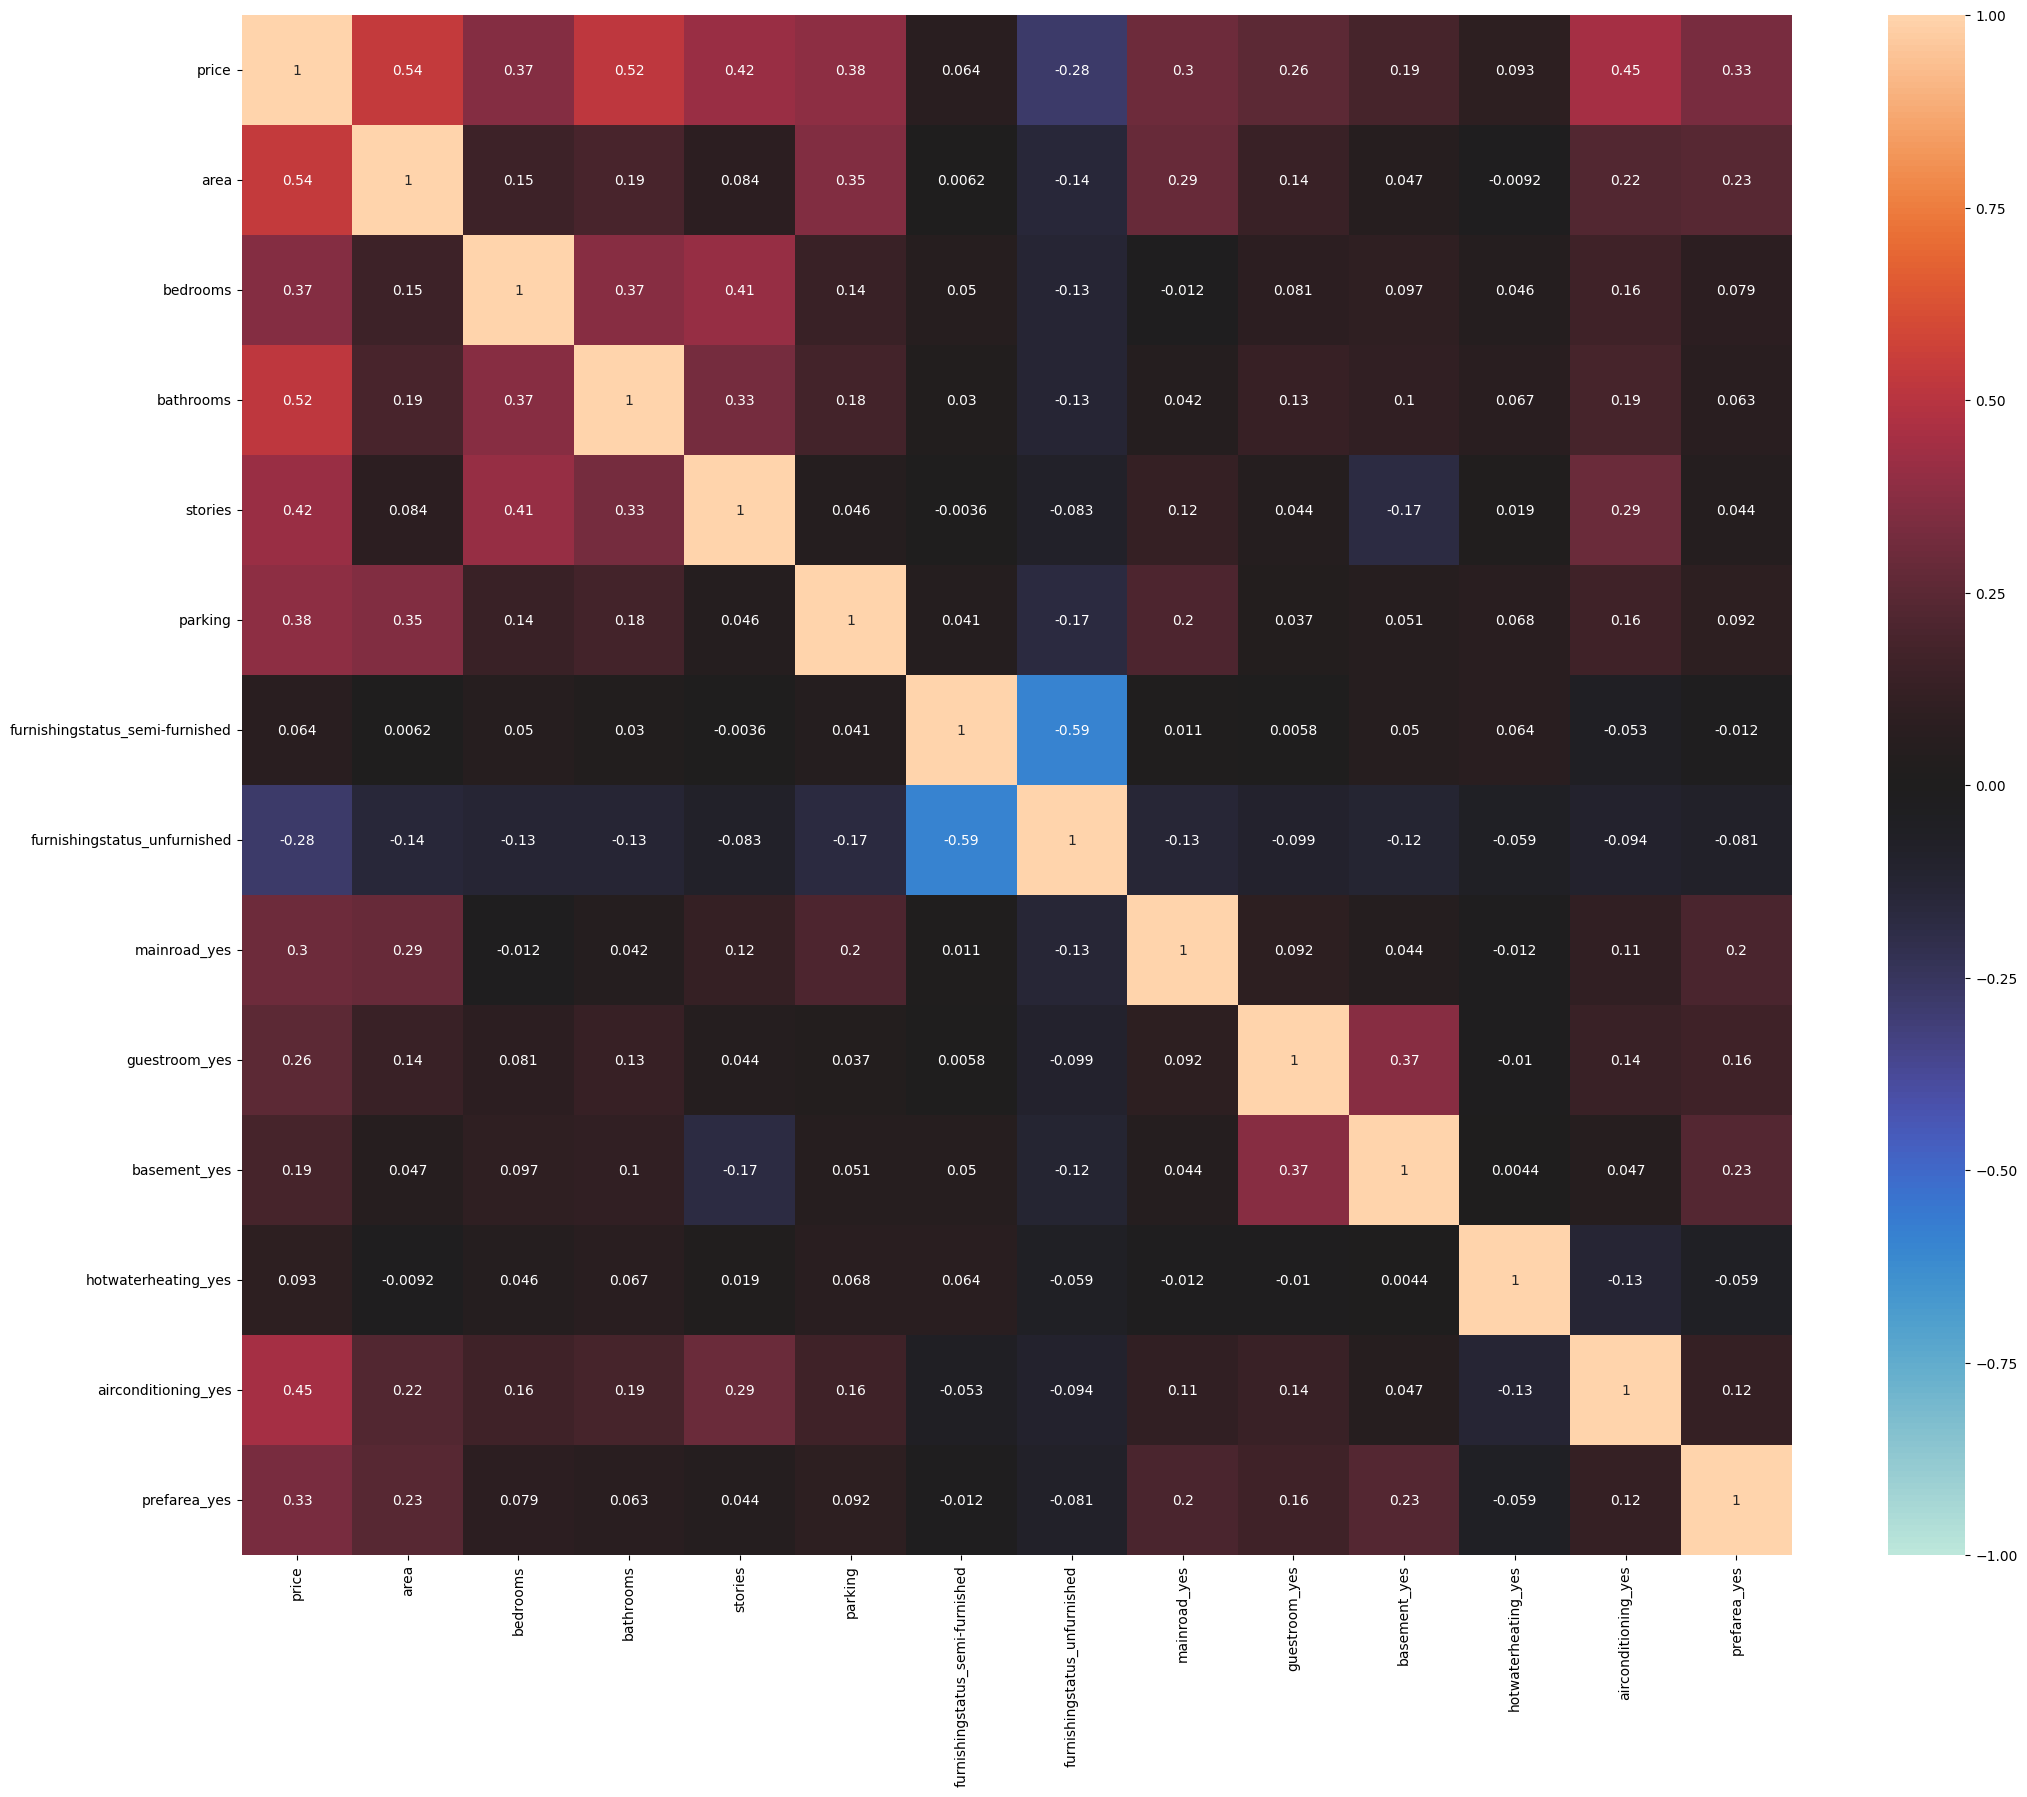

In [20]:
# Put your answer here
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

## E. Building the Model



9. Split the data set into a training and test set

In [112]:
# Put your answer here
X = data.drop(['price','basement_yes'],axis=1);
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=46)

10. Use the the `MinMaxScaler()` method to apply scaling on the independent variables in the training and test set.

In [113]:
# Put your answer here
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

11. Create a new dataframe containing the unscaled features

In [114]:
# Put your answer here
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()

area  bedrooms  bathrooms  stories  parking  \
52   6000         4          2        4        1   
107  6420         3          1        3        0   
458  3850         3          1        2        0   
516  3240         2          1        1        1   
496  4000         2          1        1        0   

     furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
52                             False                         False   
107                            False                          True   
458                            False                          True   
516                            False                          True   
496                            False                          True   

     mainroad_yes  guestroom_yes  hotwaterheating_yes  airconditioning_yes  \
52           True           True                False                 True   
107          True          False                False                False   
458          True          False                False                False   
516         False           True                False                False   
496          True          False                False                False   

     prefarea_yes  
52          False  
107          True  
458         False  
516         False  
496         False

12. Create a new dataframe containing the scaled features

In [115]:
# Put your answer here
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

area  bedrooms  bathrooms   stories   parking  \
0  0.311828       0.6   0.333333  1.000000  0.333333   
1  0.341935       0.4   0.000000  0.666667  0.000000   
2  0.157706       0.4   0.000000  0.333333  0.000000   
3  0.113978       0.2   0.000000  0.000000  0.333333   
4  0.168459       0.2   0.000000  0.000000  0.000000   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  \
0                              0.0                           0.0   
1                              0.0                           1.0   
2                              0.0                           1.0   
3                              0.0                           1.0   
4                              0.0                           1.0   

   mainroad_yes  guestroom_yes  hotwaterheating_yes  airconditioning_yes  \
0           1.0            1.0                  0.0                  1.0   
1           1.0            0.0                  0.0                  0.0   
2           1.0            0.0                  0.0                  0.0   
3           0.0            1.0                  0.0                  0.0   
4           1.0            0.0                  0.0                  0.0   

   prefarea_yes  
0           0.0  
1           1.0  
2           0.0  
3           0.0  
4           0.0

13. Create a new instance of a Linear Regression model  

In [116]:
# Put your answer here
model = LinearRegression()

14. Use the `fit()` method to train your model using the training set.

In [117]:
# Put your answer here
model.fit(X_train_scaled, y_train)

LinearRegression()

15. Use the `predict()` method using the test set

In [118]:
# Put your answer here
y_pred = model.predict(X_test_scaled)


16. Compute the $R^2$ of the model

In [121]:
# Put your answer here
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              360.9
Date:                Thu, 12 Sep 2024   Prob (F-statistic):                   4.27e-131
Time:                        10:56:51   Log-Likelihood:                         -3338.2
No. Observations:                 218   AIC:                                      6700.
Df Residuals:                     206   BIC:                                      6741.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          3.231e+06    5.1e+05      6.333      0.000    2.23e+06    4.24e+06
x2          3.027e+06   4.65e+05      6.516      0.000    2.11e+06    3.94e+06
x3          2.926e+06   5.14e+05      5.696      0.000    1.91e+06    3.94e+06
x4          1.261e+06   3.09e+05      4.074      0.000    6.51e+05    1.87e+06
x5           5.81e+05   2.94e+05      1.973      0.050     546.764    1.16e+06
x6          9.538e+04   1.82e+05      0.524      0.601   -2.64e+05    4.55e+05
x7         -1.128e+05    1.9e+05     -0.593      0.554   -4.88e+05    2.62e+05
x8          1.478e+06   1.98e+05      7.465      0.000    1.09e+06    1.87e+06
x9          6.214e+05   2.15e+05      2.889      0.004    1.97e+05    1.05e+06
x10          9.74e+05   3.36e+05      2.901      0.004    3.12e+05    1.64e+06
x11         9.753e+05   1.77e+05      5.497      0.000    6.26e+05    1.33e+06
x12         7.588e+05   2.08e+05      3.644      0.000    3.48e+05    1.17e+06
==============================================================================
Omnibus:                       10.327   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               13.683
Skew:                           0.339   Prob(JB):                      0.00107
Kurtosis:                       4.023   Cond. No.                         10.1
==============================================================================

Notes:
[1] R¬≤ is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:
olsmod.rsquared

0.9545939489395476